# UCB CE170A Assignment 1 : Structural Analysis of a Model Bridge using a Python code
v1 - Fall 2020: Prof.Kenichi Soga, Yaobin Yang, Renjie Wu  

# Install required packages

In [1]:
!pip install trusspy

# Background

<center>
<img src="https://github.com/UCB-CE170a/Fall2020/raw/master/homeworks/hw1/images/figure0.png" alt="A bridge." width="400" />
    
    An example bridge
</center>


In the sensor module scheduled later on in the semester, we will be instrumenting a model bridge and testing it to failure. A photo and schematic diagram of the model bridge is shown in Fig. 1. The model consists of two identical 2D frames placed in parallel and connected by diagonal and horizonal braces (Pink lines). A vertical load will be applied at the top two nodes using a load spreader frame (light Blue). In the experiment, the model bridge will be placed between two rigid supports as shown in Fig. 2. 




<center>
<img src="https://github.com/UCB-CE170a/Fall2020/raw/master/homeworks/hw1/images/figure1.png" alt="schematic diagram." width="600" />
    
    Figure 1. A photo and schematic diagram of the model bridge
</center>

<center>
<img src="https://github.com/UCB-CE170a/Fall2020/raw/master/homeworks/hw1/images/figure2.png" alt="A bridge." width="500" />
    
    Figure 2. Loading on the model bridge
</center>

The bridge is made of stainless steel angle bars and sheets as shown in Fig. 3. The angle bar has a dimension of ½ inch x ½ inch x 3/80 inch (thickness). Two angle bars are used for the top four frame members (Yellow lines in Fig. 1 or L2 & L3 in Fig. 2), whereas one angle bar is used for the other members (Red, Blue and Pink lines in Fig. 1 or L4 & L5 in Fig. 2). The Young’s modulus and yield strength of the angle bar are 190 GPa and 350 MPa, respectively. The members are connected by rivets. 

The design details of the model bridge are given in Fig. 4.


<center>
<img src="https://github.com/UCB-CE170a/Fall2020/raw/master/homeworks/hw1/images/figure3.png" alt="A bridge." width="400" />
    
    Figure 3. 
</center>


<center>
<img src="https://github.com/UCB-CE170a/Fall2020/raw/master/homeworks/hw1/images/figure4.png" alt="A bridge." width="600" />
    
    Figure 4. 
</center>



# Question 1:
Quiz 1 - A working load of 3500 N is applied to the model structure. Using a simplified 2D model shown in Fig. 5, perform a hand calculation of the bar forces and strains under the given load for load carrying sections, L1, L2 and L3. What is the role of bracing sections L4, L5, T1, T2, T3, T4 and T5?  Estimate the displacement at the top nodes.

Your Answer: 

L2 & L3 internal force:  -1237N, stress: -53.1Mpa, strain: -0.00028

L1 internal force:  875N, stress: 37.6Mpa, strain: -0.000197

displacement at the top node: -0.00014m

# Question 2:
Following code blocks below to use [Trusspy](https://adtzlr.github.io/trusspy/) to model the 3D model bridge. Run all the cells and **fill the TODO** parts if necessary. 


In [2]:
"""
Step 0: Import libraries  
"""
import trusspy as tp
import copy
import matplotlib.pyplot as plt
import numpy as np

In [3]:
"""
Step 1: Assign Constant and initialze the model 
"""
# # TODO: Assign proper value for the load below
# LOAD = 3.5e3   # Total Load [N] 
ELEMENT_TYPE   = 1    # truss
MATERIAL_TYPE  = 2    # elasto-plastic
YONGS_MODULUS = 190e9 # Young's modulus [Pa]
HARDENING_MODULUS = 0.01 # hardening_modulus[Pa] a very small number for elastic-perfectly plastic
YIELD_STRENGH = 350e6 # yield strength[Pa]
A = 2.33e-5 # the area of the angle section [m^2]
INCREMENT = 40

M_perfect = tp.Model(log = 1)# Trusspy model initialization 
# model settings
M_perfect.Settings.dlpf = 0.1
M_perfect.Settings.du = 0.002
M_perfect.Settings.incs = INCREMENT
M_perfect.Settings.stepcontrol = True


In [4]:
"""
Step 2: Add truss elements to the model 
"""
with M_perfect.Nodes as MN:# nodes defination unit [m]
    MN.add_node( 1, coord=(0,0,0))
    MN.add_node( 2, coord=(0.5,0,0))
    MN.add_node( 3, coord=(1,0,0))
    MN.add_node( 4, coord=(0.25,0.25,0))
    MN.add_node( 5, coord=(0.75,0.25,0))
    MN.add_node( 6, coord=(0.5,0.5,0))
    MN.add_node( 7, coord=(0,0,0.1438))
    MN.add_node( 8, coord=(0.5,0,0.1438))
    MN.add_node( 9, coord=(1,0,0.1438))
    MN.add_node( 10, coord=(0.25,0.25,0.1438))
    MN.add_node( 11, coord=(0.75,0.25,0.1438))
    MN.add_node( 12, coord=(0.5,0.5,0.1438))

In [5]:
"""
Step 3: Add truss elements to the model 
"""
with M_perfect.Elements as ME: 
    ME.add_element( 1, conn=(1,2), gprop=[A] )
    ME.add_element( 2 ,conn=(2,3), gprop=[A] )
    ME.add_element( 3, conn=(1,4), gprop=[A*2] )
    ME.add_element( 4, conn=(2,4), gprop=[A] )
    ME.add_element( 5, conn=(2,5), gprop=[A] )
    ME.add_element( 6, conn=(3,5), gprop=[A*2] )
    ME.add_element( 7, conn=(4,6), gprop=[A*2] )
    ME.add_element( 8, conn=(5,6), gprop=[A*2] )
    ME.add_element( 9, conn=(7,8), gprop=[A] )
    ME.add_element( 10 ,conn=(8,9), gprop=[A] )
    ME.add_element( 11, conn=(7,10), gprop=[A*2] )
    ME.add_element( 12, conn=(8,10), gprop=[A] )
    ME.add_element( 13, conn=(8,11), gprop=[A] )
    ME.add_element( 14, conn=(9,11), gprop=[A*2] )
    ME.add_element( 15, conn=(10,12), gprop=[A*2] )
    ME.add_element( 16, conn=(11,12), gprop=[A*2] )
    ME.add_element( 17, conn=(1,10), gprop=[A] )
    ME.add_element( 18, conn=(4,12), gprop=[A] )
    ME.add_element( 19, conn=(6,11), gprop=[A] )
    ME.add_element( 20, conn=(5,9), gprop=[A] )
    ME.add_element( 21, conn=(6,12), gprop=[A] )
    ME.add_element( 22, conn=(6,12), gprop=[A] )
    ME.add_element( 23, conn=(1,7), gprop=[A] )
    ME.add_element( 24, conn=(3,9), gprop=[A] )
    ME.add_element( 25, conn=(4,10), gprop=[A] )
    ME.add_element( 26, conn=(5,11), gprop=[A] )
    ME.assign_etype(    'all',   ELEMENT_TYPE   )
    ME.assign_mtype(    'all',  MATERIAL_TYPE   )
    ME.assign_material( 'all', [YONGS_MODULUS,HARDENING_MODULUS,YIELD_STRENGH] )

In [6]:
"""
Step 4: Set boundary conditions and external forces
"""

load = 3500
load1=-0.5*load # front force
load2=-0.5*load # back force

with M_perfect.Boundaries as MB: # boundary-displacement
    MB.add_bound_U( 1, (0,0,0) )
    MB.add_bound_U( 3, (1,0,1) )
    MB.add_bound_U( 7, (0,0,1) )
    MB.add_bound_U( 9, (1,0,1) )
    MB.add_bound_U( 2, (1,1,0) ) # this is a difference between our model and realistic word, since there is no joint in the real world for node 2 and 8
    MB.add_bound_U( 8, (1,1,0) ) # since there is no joint in the real world for node 2 and 8
    
with M_perfect.ExtForces as MF: # boundary-force
    MF.add_force( 6, ( 0, load1, 0) )
    MF.add_force( 12, ( 0, load2, 0) )


In [7]:
"""
Step 5: Build and run the model
"""
M_perfect.build()
M_perfect.run()
print ("Simulation finished")



## Step 1

### Increment 1
|     |   1  |       |1.819e-01|    |        |    |        |    |        |
|     |   2  |       |2.718e-06|    |        |    |        |    |        |
|     |   3  |       |2.331e-09|    |        |    |        |    |        |
* increase NR-step size by factor:       1.29

* final LPF:        0.1

### Increment 2
|     |   1  |       |7.532e-07|    |        |    |        |    |        |
|     |   2  |       |4.327e-09|    |        |    |        |    |        |
* increase NR-step size by factor:       1.36

* final LPF:     0.2286

### Increment 3
|     |   1  |       |2.522e-06|    |        |    |        |    |        |
|     |   2  |       |4.893e-09|    |        |    |        |    |        |
* increase NR-step size by factor:       1.36

* final LPF:     0.4031

### Increment 4
|     |   1  |       |8.427e-06|    |        |    |        |    |        |
|     |   2  |       |3.416e-09|    |        |    |        |    |        |
* increase NR-step size by factor

In [8]:
def plot_model(M):
  """plot the trusspy model
    Args:
      M: trusspy model 

    Returns:
      None, multiple figures will be plotted
  """


  # View the initial model in 3D
  fig, ax = M.plot_model(config=['undeformed'],
                        view='3d', #'xy', 'yz', 'xz'
                        contour='force',
                        lim_scale=(0,0.8,0,0.5,-0.1,0.2), #3d
                        #lim_scale=1.4, #plane-view
                        force_scale=5.0, #2
                        inc=0)
  
  # "Deformed 3D model"
  fig, ax = M.plot_model(config=['deformed'],
                        view='3d', #'xy', 'yz', 'xz'
                        contour='force',
                        lim_scale=(0,0.8,0,0.5,-0.1,0.2), #3d
                        #lim_scale=1.4, #plane-view
                        force_scale=5.0, #2
                        inc=-1)

  # "Deformed model in xz plane view"
  fig, ax = M.plot_model(config=['deformed'],
                          view='xz',
                          contour='force',
                          lim_scale=1.3,
                          force_scale=0.001,
                          inc=-1)
  
  # Deformed model in xy plane'
  fig, ax = M.plot_model(config=['deformed'],
                          view='xy',
                          contour='force',
                          lim_scale=1.3,
                          force_scale=0.0001,
                          inc=-1)





<Figure size 432x288 with 0 Axes>

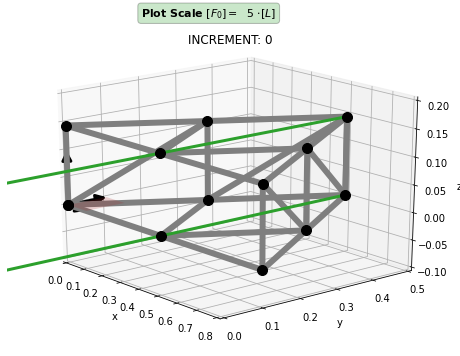

<Figure size 432x288 with 0 Axes>

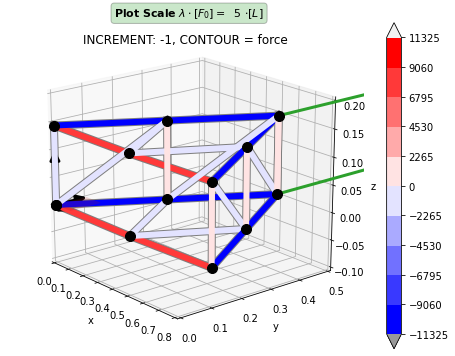

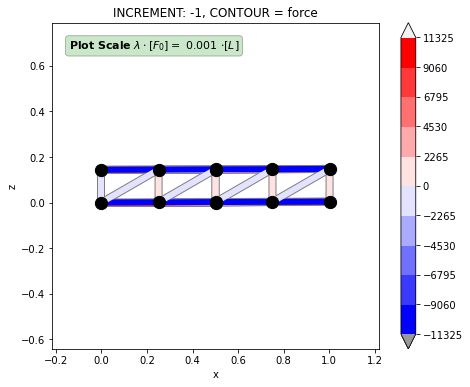

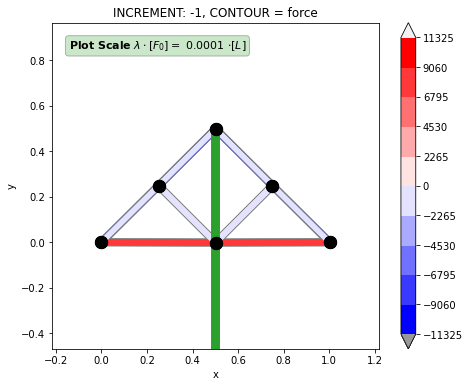

In [9]:
plot_model(M_perfect)

If the model is constructed successfully, you will see a 3D plots of the deformed model! 

## Plot the following with increasing load. Also check whether the results match to the load-strains-displacement calculated in Q1

### Q2 a): Strains and rotations in element L2







In [10]:
def get_internal_forces(M,elem): 
  """Get internal force of a element
    Args:
      M: trusspy model 
      elem: the element index of interest

    Returns:
      lpfs is a list of loading proportionality factor for this elem
      forces is a list of internal force for this elem regarding to lpfs
  """
  Res=M.Results.R
  lpfs,forces = [],[]
  for r in Res:
      force =r.element_force[elem-1]
      lpfs.append(r.lpf)
      forces.append(force[0])
  return lpfs,forces

def get_stresses(M,elem):
  """Get stress of a element
    Args:
      M: trusspy model 
      elem: the element index of interest

    Returns:
      lpfs is a list of loading proportionality factor for this elem
      stresses is a list of stress for this elem regarding to lpfs
  """
  area = M.Elements.geometric_properties[elem-1][0]
  lpfs,forces = get_internal_forces(M,elem)
  stresses = list(map(lambda f:f/A, forces))
  return lpfs,stresses


def get_strains(M,elem): 
  """Get strain of a element
    Args:
      M: trusspy model 
      elem: the element index of interest

    Returns:
      lpfs is a list of loading proportionality factor for this elem
      strains is a list of strain for this elem regarding to lpfs
  """
  E=M.Elements.material_properties[elem-1][0]
  lpfs,stresses = get_stresses(M,elem)
  strains=list(map(lambda stress:stress/E, stresses))
  return lpfs,strains


def get_rotation_degrees(M,elem):
  """Get rotation degrees of a element
    Args:
      M: trusspy model 
      elem: the element index of interest

    Returns:
      lpfs is a list of loading proportionality factor for this elem
      degrees is a list of rotation degree for this elem regarding to lpfs
  """
  con=M.Elements.conns[elem-1]
  con1,con2 =con[0], con[1]
  nc1,nc2=M.Nodes.coords[con1-1], M.Nodes.coords[con2-1]
  r_0=nc2-nc1

  Res=M.Results.R
  lpfs,degrees = [],[]
  for Re in Res:
      U1=Re.U[con1-1]
      U2=Re.U[con2-1]
      nc1_1=nc1+U1
      nc2_1=nc2+U2
      r_1=nc2_1-nc1_1
      cosangle = r_0.dot(r_1)/(np.linalg.norm(r_0) * np.linalg.norm(r_1))
      theta=np.arccos(cosangle)
      lpfs.append(Re.lpf)
      degrees.append(theta)
  return lpfs,degrees


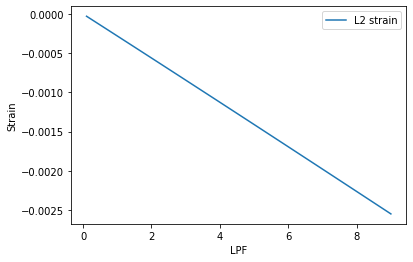

In [11]:
lpf,epis= get_strains(M_perfect,3)

plt.plot(lpf,epis,label='L2 strain')
plt.xlabel('LPF')
plt.ylabel('Strain')
plt.legend()


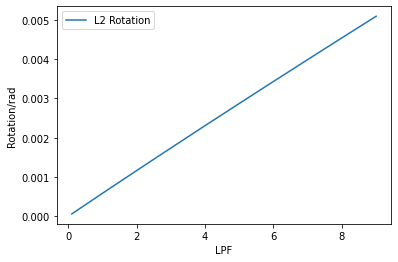

In [12]:
lpf,thetas= get_rotation_degrees(M_perfect,3)
plt.plot(lpf,thetas,label='L2 Rotation')
plt.xlabel('LPF')
plt.ylabel('Rotation/rad')
plt.legend()

### Q2 b): Expected expansion of element L1



In [13]:
def get_expansion(M,elem):
  """Get expansion of a element
    Args:
      M: trusspy model 
      elem: the element index of interest

    Returns:
      lpfs is a list of loading proportionality factor for this elem
      expansions is a list of rotation degree for this elem regarding to lpfs
  """
  con=M.Elements.conns[elem-1]
  con1=con[0]
  con2=con[1]
  nc1=M.Nodes.coords[con1-1]
  nc2=M.Nodes.coords[con2-1]
  r_0=nc2-nc1
  L=np.linalg.norm(r_0)
  lpfs,strains = get_strains(M,elem)
  expansions=list(map(lambda strain:strain*L, strains))
  return lpfs,expansions


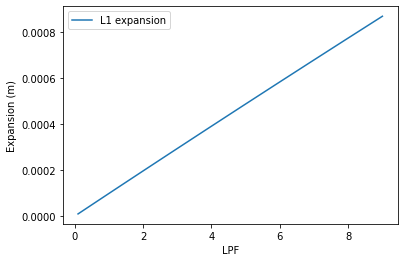

In [14]:
lpf,exp= get_expansion(M_perfect,1)
plt.figure()
plt.plot(lpf,exp,label='L1 expansion')
plt.xlabel('LPF')
plt.ylabel('Expansion (m)')
plt.legend()

### Q2 c): Expected loads in braces. L4, L5 and Ts.

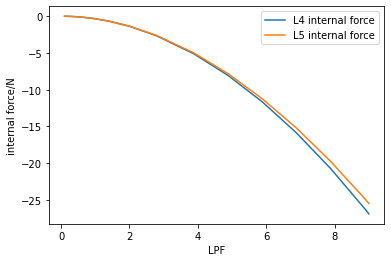

In [15]:
lpf,force= get_internal_forces(M_perfect,4)
plt.plot(lpf,force,label='L4 internal force')
plt.xlabel('LPF')
plt.ylabel('internal force/N')
plt.legend()


lpf,force= get_internal_forces(M_perfect,5)
plt.plot(lpf,force,label='L5 internal force')
plt.xlabel('LPF')
plt.ylabel('internal force/N')
plt.legend()



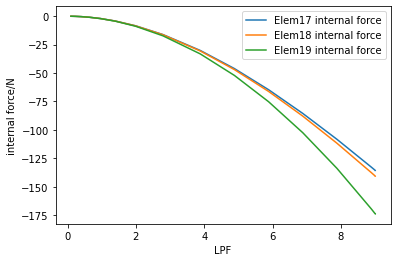

In [16]:
lpf,force= get_internal_forces(M_perfect,17)
plt.plot(lpf,force,label='Elem17 internal force')
lpf,force= get_internal_forces(M_perfect,18)
plt.plot(lpf,force,label='Elem18 internal force')
lpf,force= get_internal_forces(M_perfect,19)
plt.plot(lpf,force,label='Elem19 internal force')
plt.xlabel('LPF')
plt.ylabel('internal force/N')
plt.legend()

# Question 3: 

The actual model will have some imperfections. One possible imperfection is that the four ends are not perfectly horizontally leveled. To examine this effect, create a new model with vertical spring at one of the roller ends in your 3D model, as shown in Fig. 6. Construct the imperfect model using Trusspy

<center>
<img src="https://github.com/UCB-CE170a/Fall2020/raw/master/homeworks/hw1/images/figure7.png" alt="A bridge." width="600" />
    
    Figure 6. 
</center>

In [17]:
def construct_imperfect_model(vertical_spring_stiffness):
  """construct a imperfect trusspy model using vertical spring 
    Args:
      vertical_spring_stiffness: stiffness of the spring 

    Returns:
      M: the constructed Trusspy Model
  """

  """
  Step 1: Assign Constant and initialze the model 
  """

  M = tp.Model(log = 0)# Trusspy model initialization 
  # model settings
  M.Settings.dlpf = 0.1
  M.Settings.du = 0.002
  M.Settings.incs = INCREMENT
  M.Settings.stepcontrol = True
  

  """
  Step 2: Add truss elements to the model 
  """
  with M.Nodes as MN:# nodes defination unit [m]
      MN.add_node( 1, coord=(0,0,0))
      MN.add_node( 2, coord=(0.5,0,0))
      MN.add_node( 3, coord=(1,0,0))
      MN.add_node( 4, coord=(0.25,0.25,0))
      MN.add_node( 5, coord=(0.75,0.25,0))
      MN.add_node( 6, coord=(0.5,0.5,0))
      MN.add_node( 7, coord=(0,0,0.1438))
      MN.add_node( 8, coord=(0.5,0,0.1438))
      MN.add_node( 9, coord=(1,0,0.1438))
      MN.add_node( 10, coord=(0.25,0.25,0.1438))
      MN.add_node( 11, coord=(0.75,0.25,0.1438))
      MN.add_node( 12, coord=(0.5,0.5,0.1438))
      MN.add_node( 13, coord=(1,-1,0))

  
  """
  Step 3: Add truss elements to the model 
  """
  with M.Elements as ME: 
      ME.add_element( 1, conn=(1,2), gprop=[A] )
      ME.add_element( 2 ,conn=(2,3), gprop=[A] )
      ME.add_element( 3, conn=(1,4), gprop=[A*2] )
      ME.add_element( 4, conn=(2,4), gprop=[A] )
      ME.add_element( 5, conn=(2,5), gprop=[A] )
      ME.add_element( 6, conn=(3,5), gprop=[A*2] )
      ME.add_element( 7, conn=(4,6), gprop=[A*2] )
      ME.add_element( 8, conn=(5,6), gprop=[A*2] )
      ME.add_element( 9, conn=(7,8), gprop=[A] )
      ME.add_element( 10 ,conn=(8,9), gprop=[A] )
      ME.add_element( 11, conn=(7,10), gprop=[A*2] )
      ME.add_element( 12, conn=(8,10), gprop=[A] )
      ME.add_element( 13, conn=(8,11), gprop=[A] )
      ME.add_element( 14, conn=(9,11), gprop=[A*2] )
      ME.add_element( 15, conn=(10,12), gprop=[A*2] )
      ME.add_element( 16, conn=(11,12), gprop=[A*2] )
      ME.add_element( 17, conn=(1,10), gprop=[A] )
      ME.add_element( 18, conn=(4,12), gprop=[A] )
      ME.add_element( 19, conn=(6,11), gprop=[A] )
      ME.add_element( 20, conn=(5,9), gprop=[A] )
      ME.add_element( 21, conn=(6,12), gprop=[A] )
      ME.add_element( 22, conn=(6,12), gprop=[A] )
      ME.add_element( 23, conn=(1,7), gprop=[A] )
      ME.add_element( 24, conn=(3,9), gprop=[A] )
      ME.add_element( 25, conn=(4,10), gprop=[A] )
      ME.add_element( 26, conn=(5,11), gprop=[A] )

      spring_area=vertical_spring_stiffness*1e-9/190 # convert the spring stiffness into geometry property of a truss element
      ME.add_element( 30, conn=(3,13), gprop=[spring_area] )


      ME.assign_etype(list(range(1,30)),   ELEMENT_TYPE)
      ME.assign_mtype(list(range(1,30)),  MATERIAL_TYPE )
      ME.assign_material( list(range(1,30)), [YONGS_MODULUS,HARDENING_MODULUS,YIELD_STRENGH] )
      ME.assign_material( [30], [YONGS_MODULUS,HARDENING_MODULUS,YIELD_STRENGH*1000] )

    
  """
  Step 4: Set boundary conditions and external forces
  """

  load = 3500
  load1=-0.5*load # front force
  load2=-0.5*load # back force

  with M.Boundaries as MB: # boundary-displacement
      MB.add_bound_U( 1, (0,0,0) )
      MB.add_bound_U( 3, (1,1,1) )
      MB.add_bound_U( 7, (0,0,1) )
      MB.add_bound_U( 9, (1,0,1) )
      MB.add_bound_U( 13, (0,0,0) )
      MB.add_bound_U( 2, (1,1,0) ) # this is a difference between our model and realistic word, since there is no joint in the real world for node 2 and 8
      MB.add_bound_U( 8, (1,1,0) ) # since there is no joint in the real world for node 2 and 8
      
  with M.ExtForces as MF: # boundary-force
      MF.add_force( 6, ( 0, load1, 0) )
      MF.add_force( 12, ( 0, load2, 0) )


  """
  Step 5: Build and run the model
  """
  M.build()
  M.run()
  print ("Simulation finished")
  
  return M
        




In [18]:
M1=construct_imperfect_model(1e5)
M2=construct_imperfect_model(1e6)
M3=construct_imperfect_model(1e8)

* reduce NR-step size by factor: (inactive) due to recycle.
* reduce NR-step size by factor:      0.125

* recycling increment
* reduce NR-step size by factor: (inactive) due to recycle.
* reduce NR-step size by factor:      0.125

* recycling increment
* increase NR-step (inactive). incs since last reduction: 1/3
* increase NR-step (inactive). incs since last reduction: 2/3
* increase NR-step (inactive). incs since last reduction: 3/3
* increase NR-step size by factor:       1.36
* increase NR-step size by factor:       1.36
* increase NR-step size by factor:       1.36
* increase NR-step size by factor:       1.36
* increase NR-step size by factor:       1.36
* increase NR-step size by factor:       1.36
* increase NR-step size by factor:       1.36
* increase NR-step size by factor:       1.36
* increase NR-step size by factor:       1.36
* increase NR-step size by factor:       1.36
* increase NR-step size by factor:       1.29
* increase NR-step size by factor:       1.29
* increa

<Figure size 432x288 with 0 Axes>

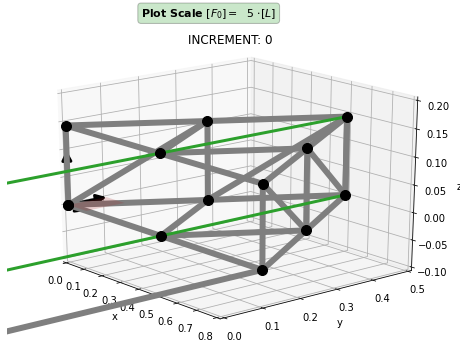

<Figure size 432x288 with 0 Axes>

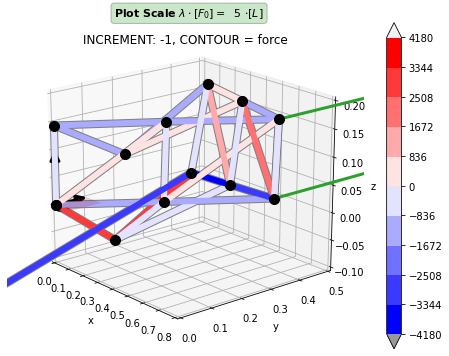

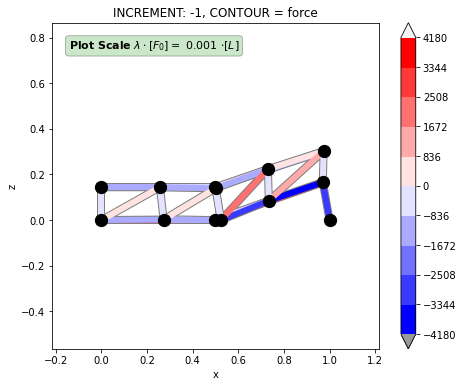

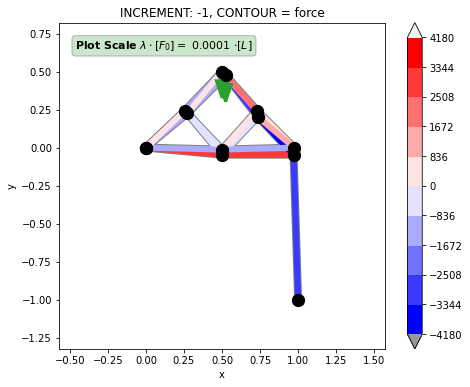

In [19]:
plot_model(M1)

<Figure size 432x288 with 0 Axes>

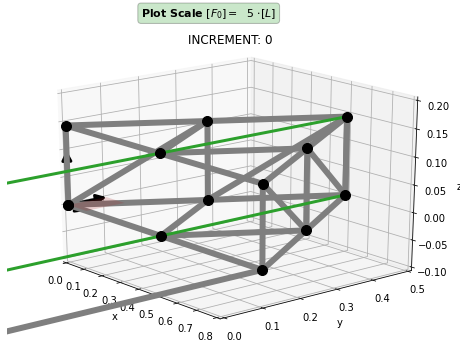

<Figure size 432x288 with 0 Axes>

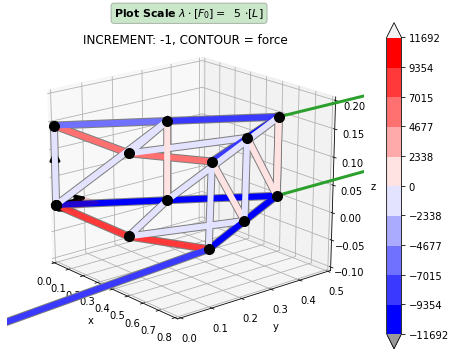

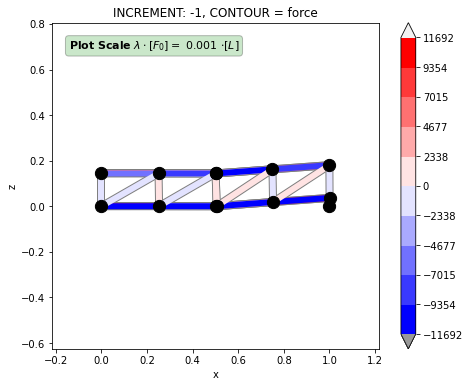

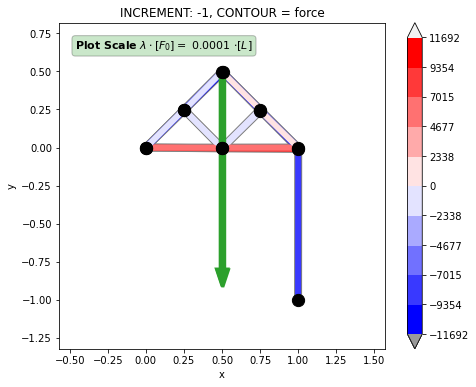

In [20]:
plot_model(M2)

<Figure size 432x288 with 0 Axes>

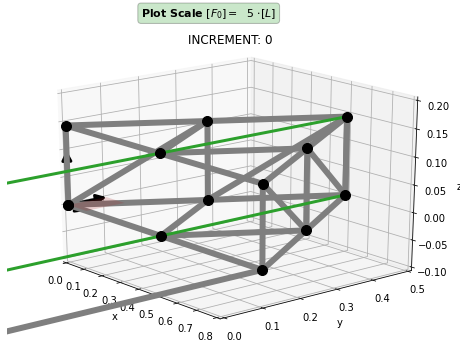

<Figure size 432x288 with 0 Axes>

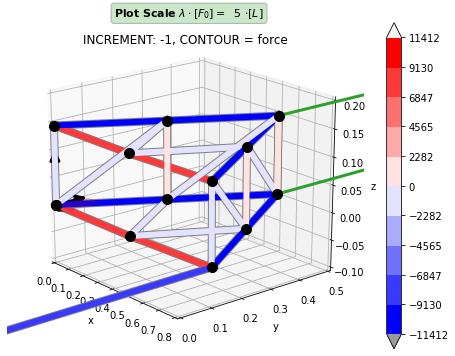

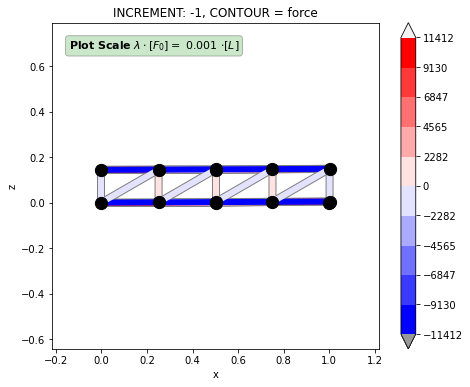

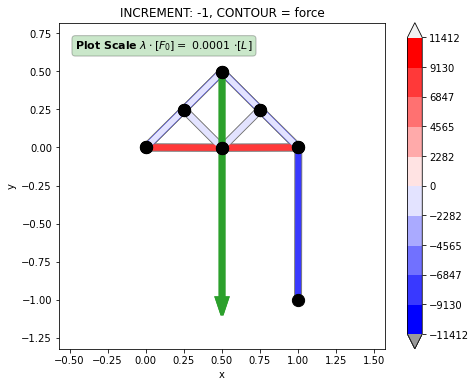

In [21]:
plot_model(M3)

##  Plot the following with increasing load on the plots you created in question 2. Try different spring stiffness values (softer one represents more imperfection). 

### Q3 a): Strains and rotations in element L2, L3







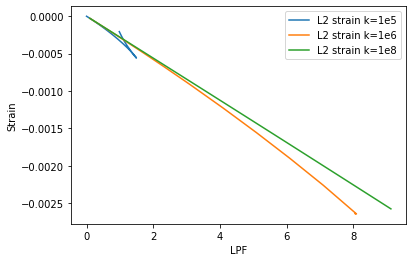

In [22]:
plt.figure()
lpf1,epis1= get_strains(M1,3)
plt.plot(lpf1,epis1,label='L2 strain k=1e5')
lpf2,epis2= get_strains(M2,3)
plt.plot(lpf2,epis2,label='L2 strain k=1e6')
lpf3,epis3= get_strains(M3,3)
plt.plot(lpf3,epis3,label='L2 strain k=1e8')
plt.xlabel('LPF')
plt.ylabel('Strain')
plt.legend()

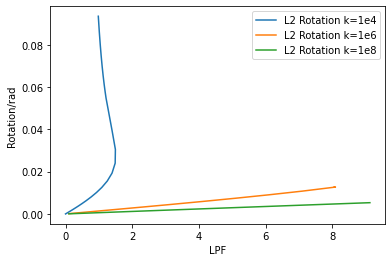

In [23]:
plt.figure()
lpf1,thetas1= get_rotation_degrees(M1,3)
lpf2,thetas2= get_rotation_degrees(M2,3)
lpf3,thetas3= get_rotation_degrees(M3,3)
plt.plot(lpf1,thetas1,label='L2 Rotation k=1e4')
plt.plot(lpf2,thetas2,label='L2 Rotation k=1e6')
plt.plot(lpf3,thetas3,label='L2 Rotation k=1e8')
plt.xlabel('LPF')
plt.ylabel('Rotation/rad')
plt.legend()

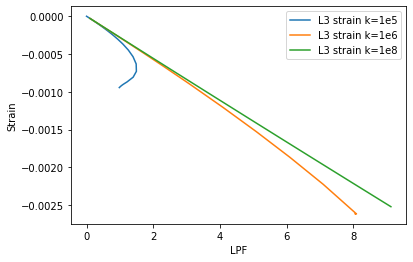

In [24]:
plt.figure()
lpf1,epis1= get_strains(M1,6)
plt.plot(lpf1,epis1,label='L3 strain k=1e5')
lpf2,epis2= get_strains(M2,6)
plt.plot(lpf2,epis2,label='L3 strain k=1e6')
lpf3,epis3= get_strains(M3,6)
plt.plot(lpf3,epis3,label='L3 strain k=1e8')
plt.xlabel('LPF')
plt.ylabel('Strain')
plt.legend()


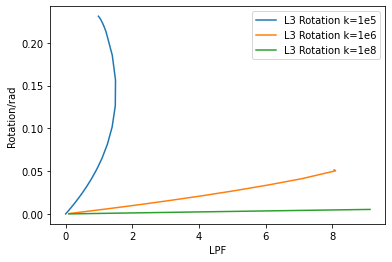

In [25]:
plt.figure()
lpf1,thetas1= get_rotation_degrees(M1,6)
lpf2,thetas2= get_rotation_degrees(M2,6)
lpf3,thetas3= get_rotation_degrees(M3,6)
plt.plot(lpf1,thetas1,label='L3 Rotation k=1e5')
plt.plot(lpf2,thetas2,label='L3 Rotation k=1e6')
plt.plot(lpf3,thetas3,label='L3 Rotation k=1e8')
plt.xlabel('LPF')
plt.ylabel('Rotation/rad')
plt.legend()

### Q3 b): Expected expansion of element L1

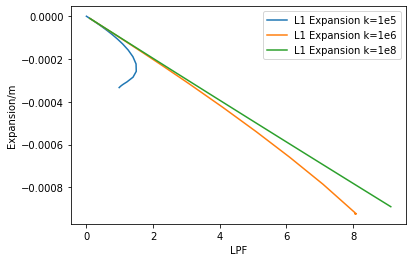

In [26]:

lpf1,e1= get_expansion(M1,6)
lpf2,e2= get_expansion(M2,6)
lpf3,e3= get_expansion(M3,6)
plt.plot(lpf1,e1,label='L1 Expansion k=1e5')
plt.plot(lpf2,e2,label='L1 Expansion k=1e6')
plt.plot(lpf3,e3,label='L1 Expansion k=1e8')
plt.xlabel('LPF')
plt.ylabel('Expansion/m')
plt.legend()

### Q3 c): Expected loads in braces L4, L5 and Ts.

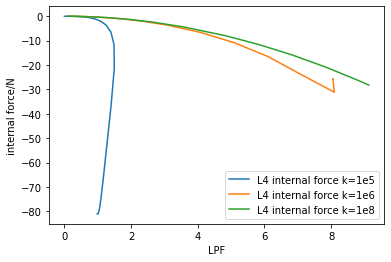

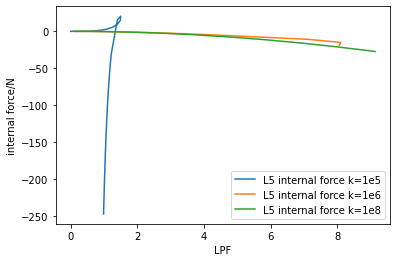

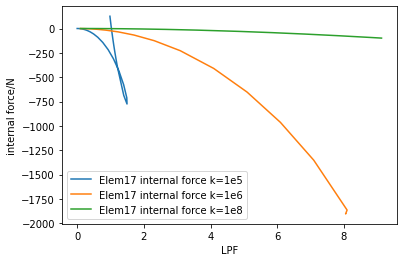

In [27]:
plt.figure()
lpf,force= get_internal_forces(M1,4)
plt.plot(lpf,force,label='L4 internal force k=1e5')
lpf,force= get_internal_forces(M2,4)
plt.plot(lpf,force,label='L4 internal force k=1e6')
lpf,force= get_internal_forces(M3,4)
plt.plot(lpf,force,label='L4 internal force k=1e8')
plt.xlabel('LPF')
plt.ylabel('internal force/N')
plt.legend()

plt.figure()
lpf,force= get_internal_forces(M1,5)
plt.plot(lpf,force,label='L5 internal force k=1e5')
lpf,force= get_internal_forces(M2,5)
plt.plot(lpf,force,label='L5 internal force k=1e6')
lpf,force= get_internal_forces(M3,5)
plt.plot(lpf,force,label='L5 internal force k=1e8')
plt.xlabel('LPF')
plt.ylabel('internal force/N')
plt.legend()

plt.figure()
lpf,force= get_internal_forces(M1,17)
plt.plot(lpf,force,label='Elem17 internal force k=1e5')
lpf,force= get_internal_forces(M2,17)
plt.plot(lpf,force,label='Elem17 internal force k=1e6')
lpf,force= get_internal_forces(M3,17)
plt.plot(lpf,force,label='Elem17 internal force k=1e8')
plt.xlabel('LPF')
plt.ylabel('internal force/N')
plt.legend()

# Q4:
t is designed to carry loads without collapse at this working load and the factor of safety to collapse is FS>2.0. Discuss possible failure mechanisms of the model bridge (see Fig. 6 for possible structural failures).

<center>
<img src="https://github.com/UCB-CE170a/Fall2020/raw/master/homeworks/hw1/images/figure5.png" alt="A bridge." width="600" />
    
    Figure 5. 
</center>


<center>
<img src="https://github.com/UCB-CE170a/Fall2020/raw/master/homeworks/hw1/images/figure6.png" alt="A bridge." width="600" />
    
    Figure 6. 
</center>



Answer: 